In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
import seaborn as sb

In [2]:
import os

In [3]:
def model_index(file_name):
    return int(file_name.split('_')[1])

In [4]:
def read_leaderboard(file_name, scale=False):
    result = []
    with open(file_name, "rt", encoding='utf-8') as fd:
        started = False
        for l in fd:
            l = l.strip()
            if not started:
                if l.startswith("Leaderboard"):
                    started = True
                continue
            name, rest = l.split(':')
            wld = map(str.strip, rest.split(','))
            win, lose, draw = map(lambda s: int(s.split('=')[1]), wld)
            # models from the last round played 40% more games, so score need to be compensated
            if scale:
                win = int(win / 1.4)
                lose = int(lose / 1.4)
                draw = int(draw / 1.4)
            result.append((os.path.basename(name), win, lose, draw))
    return result       

# Semi-final analisys

In [5]:
full_data = []
for round in range(10):
    full_data.extend(read_leaderboard("semi-%d.txt" % round, scale=round==9))

In [6]:
full_data.sort(key=lambda p: p[1], reverse=True)
full_data[:10]

[('best_105_62400.dat', 1244, 895, 2),
 ('best_091_51000.dat', 1213, 928, 0),
 ('best_104_61500.dat', 1157, 983, 2),
 ('best_097_57800.dat', 1147, 995, 0),
 ('best_095_54400.dat', 1132, 1009, 0),
 ('best_090_50100.dat', 1128, 1012, 1),
 ('best_103_60800.dat', 1120, 1021, 0),
 ('best_099_58700.dat', 1097, 1044, 0),
 ('best_096_57700.dat', 1088, 1051, 2),
 ('best_102_60600.dat', 1065, 1076, 1)]

In [7]:
full_pairs = list(map(lambda p: (model_index(p[0]), p[1]), full_data))
full_pairs.sort(key=lambda p: p[0])
indices, wins = zip(*full_pairs)

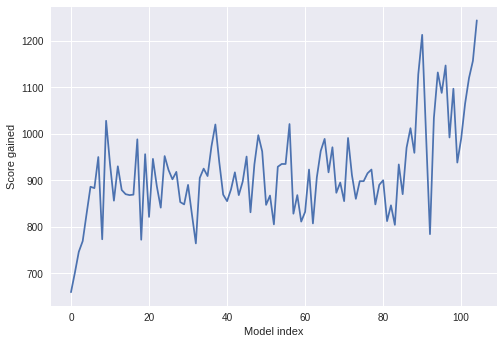

In [8]:
plt.plot(wins)
plt.xlabel("Model index")
plt.ylabel("Score gained")
plt.savefig("semi-common.png")

In [9]:
def group_index(idx):
    if idx >= 100:
        return 9, idx - 90
    return idx // 10, idx % 10

In [10]:
groups = list(map(group_index, indices))

In [11]:
data = [[] for _ in range(10)]
for g, w in zip(groups, wins):
    data[g[0]].append(w)

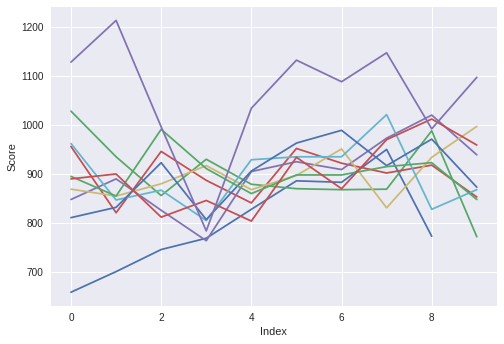

In [12]:
for d in data:
    plt.plot(d[:10])
plt.xlabel("Index")
plt.ylabel("Score")
plt.savefig("semi-scores.png")

# Final scores

In [13]:
final_short = read_leaderboard("final.txt")
full_pairs = list(map(lambda p: (model_index(p[0]), p[1]), final_short))
full_pairs.sort(key=lambda p: p[0])
indices, wins = zip(*full_pairs)

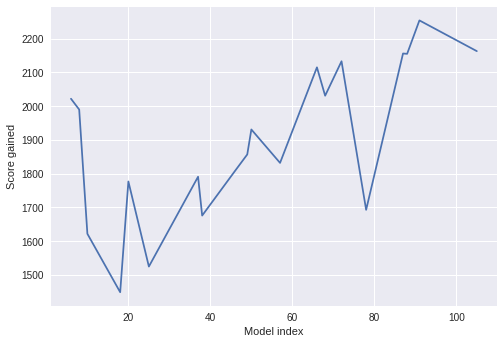

In [14]:
plt.plot(indices, wins)
plt.xlabel("Model index")
plt.ylabel("Score gained")
plt.grid(True)
plt.savefig("final-short.png")

In [16]:
import pandas as pd

In [20]:
full_pairs = list(map(lambda p: (model_index(p[0]), p[1]/(p[1]+p[2]+p[3])), final_short))
full_pairs.sort(key=lambda p: p[0])
indices, ratios = zip(*full_pairs)

In [25]:
df = pd.DataFrame(data={'model_index': indices, 'wins': ratios})
df

,model_index,wins
0,6,0.532105
1,8,0.523684
2,10,0.426842
3,18,0.381316
4,20,0.467632
5,25,0.401316
6,37,0.471316
7,38,0.441053
8,46,0.475789
9,49,0.488684


In [26]:
df.to_csv("final.csv", index=None)

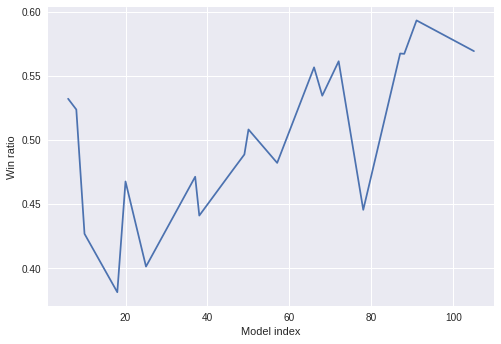

In [22]:
plt.plot(indices, ratios)
plt.xlabel("Model index")
plt.ylabel("Win ratio")
plt.grid(True)
plt.savefig("final-short.png")